# 1. Data Preparation:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('/content/heart_disease.xlsx',sheet_name='Heart_disease')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


converting boolion to int

In [ ]:
df['fbs'] = df['fbs'].astype(int)

now we are converting sex and exang as int

# 2. Exploratory Data Analysis (EDA):

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


as we see there is a missing values column remove them

In [ ]:
# Remove rows with any missing values
df.dropna(inplace=True)

In [ ]:
def outlier_count(df):
    outlier_counts = {}
    for col in df.select_dtypes(include=np.number).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = len(outliers)
    return outlier_counts

outlier_counts = outlier_count(df)
outlier_counts

{'age': 0,
 'trestbps': 30,
 'chol': 173,
 'fbs': 158,
 'thalch': 2,
 'oldpeak': 16,
 'num': 0}

converting the columns which has two values in to 0 and 1

In [ ]:
df['sex'] = df['sex'].replace({'Male': 1, 'Female': 0})
df['exang'] = df['exang'].replace({True: 1, False: 0})

using one hot encodding for all catogorical variable

In [ ]:
# using encoding on columns with more than two values
df = pd.get_dummies(df, dtype = int)

in my openion not treating outliers is a good choice because data is based on the patiences over all test to predict does who could have heart disease

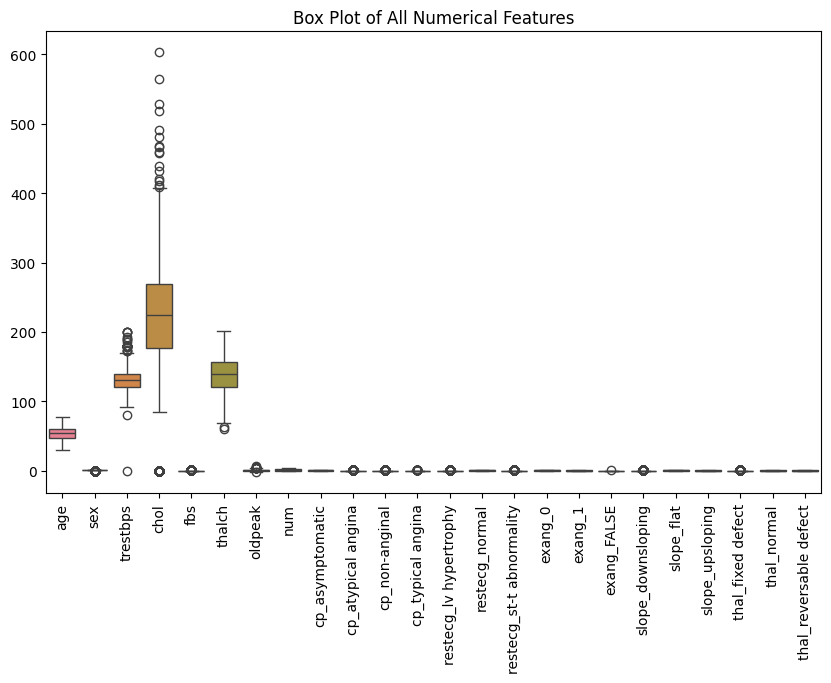

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box Plot of All Numerical Features')
plt.xticks(rotation=90)
plt.show()

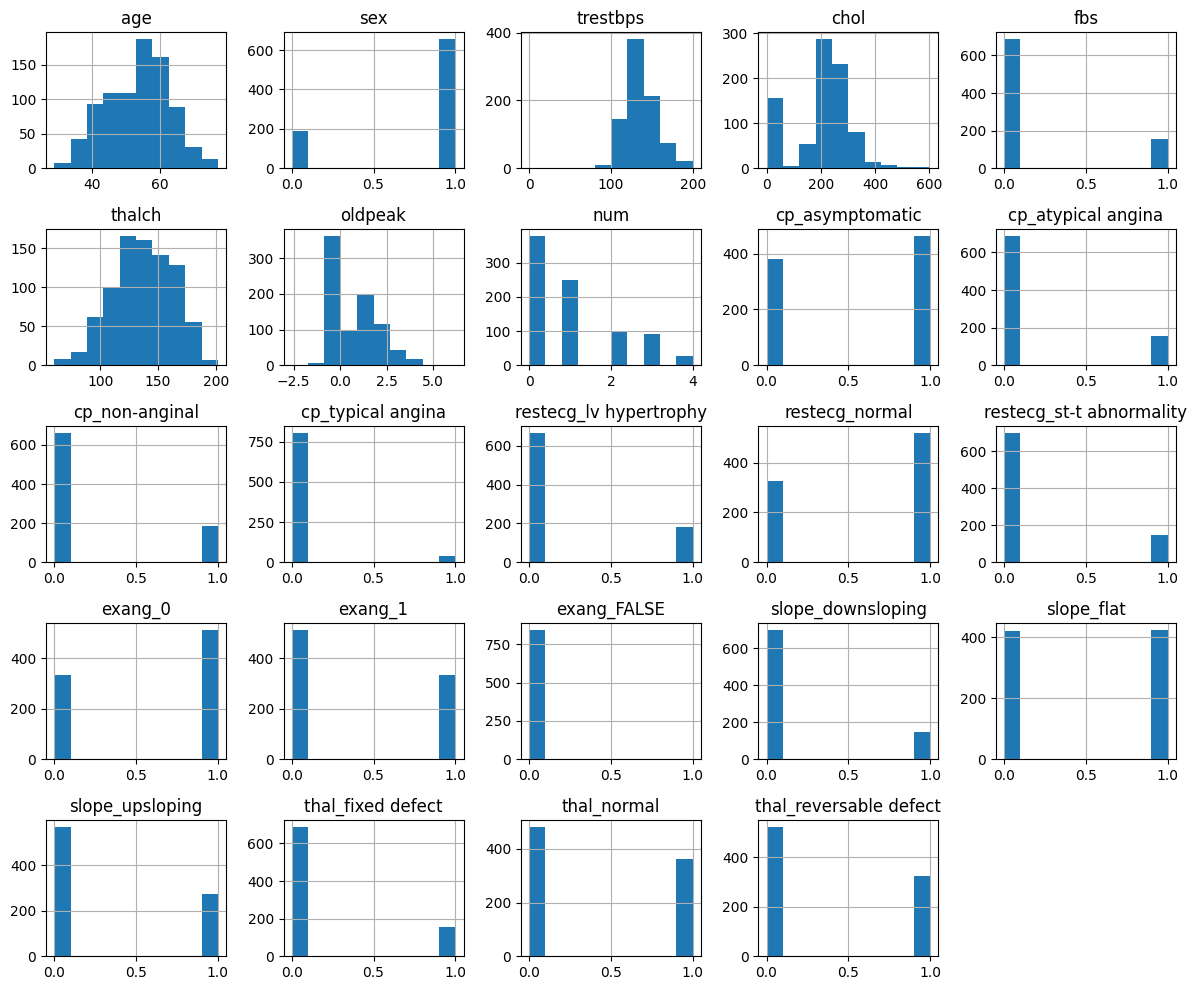

In [ ]:
# Distribution of Numerical Variables
df.hist(figsize=(12, 10), bins=10)
plt.tight_layout()
plt.show()

now we can clearly vissualize the data distribution

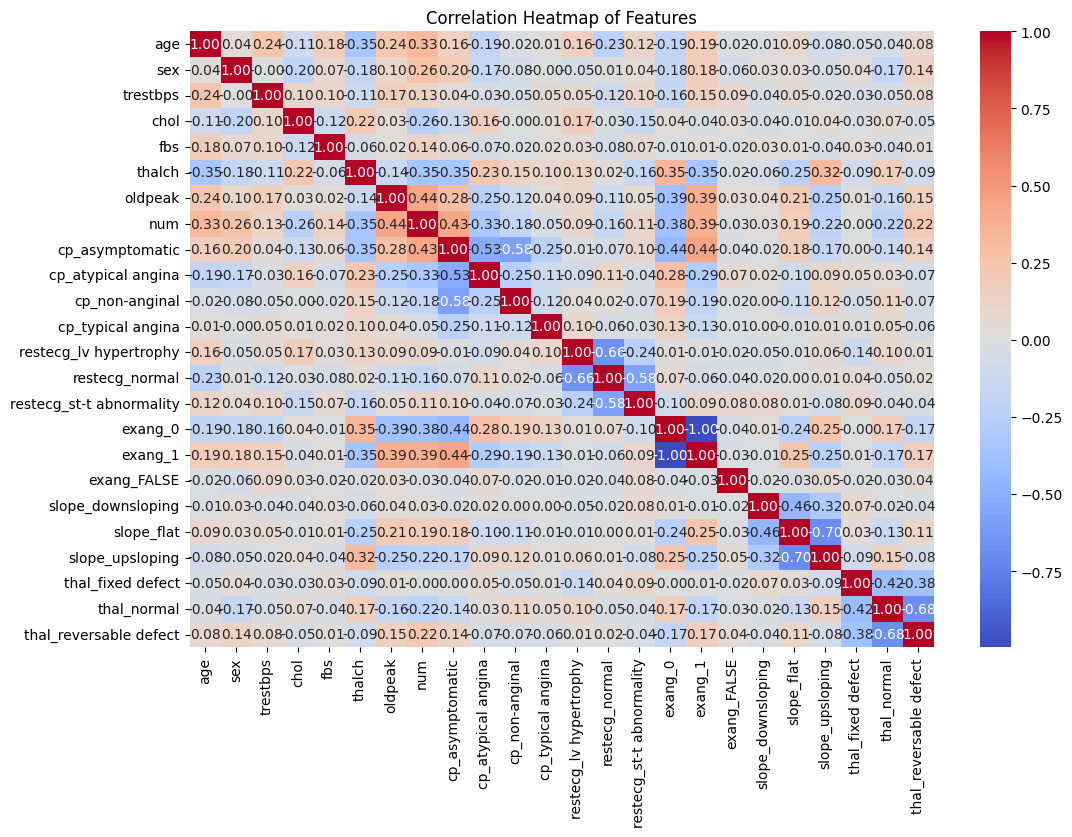

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

we are hear to predict the num and we see num is highly corellated with oldpeak in positive way and num is highly correlated with thalch

# 3. Feature Engineering:

we use scalling feature for bringing them equal range

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'num' is the target variable and should not be scaled
columns_to_scale = df.columns.difference(['num'])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the scaled DataFrame (optional)
df.head()

,age,sex,trestbps,chol,fbs,thalch,oldpeak,num,cp_asymptomatic,cp_atypical angina,...,restecg_st-t abnormality,exang_0,exang_1,exang_FALSE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,0.708333,1.0,0.725,0.386401,1.0,0.633803,0.556818,0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.250000,1.0,0.675,0.336650,0.0,0.507042,0.295455,0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.583333,1.0,0.700,0.318408,0.0,0.619718,0.340909,0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.479167,1.0,0.590,0.308458,0.0,0.915493,0.295455,0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.583333,1.0,0.550,0.333333,0.0,0.464789,0.465909,0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


# 4. Decision Tree Classification:

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'num' is the target variable
X = df.drop('num', axis=1)
y = df['num']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-score (weighted): {f1:.4f}")

Accuracy: 0.5529
Precision (weighted): 0.5526
Recall (weighted): 0.5529
F1-score (weighted): 0.5366


In [ ]:
# Calculate ROC AUC
y_pred_proba = dt_model.predict_proba(X_test)  # Get probabilities for all classes
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')  # Use 'ovr' or 'ovo'

print(f"ROC AUC: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
cr

ROC AUC: 0.6371
Confusion Matrix:
[[60 16  2  1  1]
 [13 23  2  3  0]
 [ 4  4  6  0  0]
 [ 3 16  3  4  1]
 [ 1  3  1  2  1]]
Classification Report:


'              precision    recall  f1-score   support\n\n           0       0.74      0.75      0.75        80\n           1       0.37      0.56      0.45        41\n           2       0.43      0.43      0.43        14\n           3       0.40      0.15      0.22        27\n           4       0.33      0.12      0.18         8\n\n    accuracy                           0.55       170\n   macro avg       0.45      0.40      0.40       170\nweighted avg       0.55      0.55      0.54       170\n'

# 5. Hyperparameter Tuning:

In [ ]:
# prompt: hyper tuning

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [10,20,40],
    'min_samples_leaf': [9,16,24],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best accuracy score from cross-validation: {best_score:.4f}")

# Train a new model with the best parameters
best_dt_model = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_model.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred_best = best_dt_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')
y_pred_proba_best = best_dt_model.predict_proba(X_test)
roc_auc_best = roc_auc_score(y_test, y_pred_proba_best, multi_class='ovr')

print("\nEvaluation of the best model on the test set:")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"Precision (weighted): {precision_best:.4f}")
print(f"Recall (weighted): {recall_best:.4f}")
print(f"F1-score (weighted): {f1_best:.4f}")
print(f"ROC AUC: {roc_auc_best:.4f}")

cm_best = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix (Best Model):")
print(cm_best)

cr_best = classification_report(y_test, y_pred_best)
print("Classification Report (Best Model):")
cr_best

Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 9, 'min_samples_split': 10}
Best accuracy score from cross-validation: 0.5725

Evaluation of the best model on the test set:
Accuracy: 0.5706
Precision (weighted): 0.5665
Recall (weighted): 0.5706
F1-score (weighted): 0.5462
ROC AUC: 0.7318
Confusion Matrix (Best Model):
[[66 12  2  0  0]
 [12 25  2  2  0]
 [ 1 12  1  0  0]
 [ 2 15  5  5  0]
 [ 0  5  1  2  0]]
Classification Report (Best Model):


'              precision    recall  f1-score   support\n\n           0       0.81      0.82      0.82        80\n           1       0.36      0.61      0.45        41\n           2       0.09      0.07      0.08        14\n           3       0.56      0.19      0.28        27\n           4       0.00      0.00      0.00         8\n\n    accuracy                           0.57       170\n   macro avg       0.36      0.34      0.33       170\nweighted avg       0.57      0.57      0.55       170\n'

# 6. Model Evaluation and Analysis:

In [ ]:
# Analysis of Decision Tree Model Performance

# The Decision Tree model was evaluated using several metrics, including Accuracy, Precision,
# Recall, F1-score, ROC AUC, Confusion Matrix, and Classification Report.

print("Initial Decision Tree Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-score (weighted): {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(cr)

# After hyperparameter tuning using GridSearchCV, the model's performance was re-evaluated
# on the test set.

print("\nPerformance of the Best Decision Tree Model after Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"Precision (weighted): {precision_best:.4f}")
print(f"Recall (weighted): {recall_best:.4f}")
print(f"F1-score (weighted): {f1_best:.4f}")
print(f"ROC AUC: {roc_auc_best:.4f}")
print("\nConfusion Matrix (Best Model):")
print(cm_best)
print("\nClassification Report (Best Model):")
cr_best

Initial Decision Tree Model Performance:
Accuracy: 0.5529
Precision (weighted): 0.5526
Recall (weighted): 0.5529
F1-score (weighted): 0.5366
ROC AUC: 0.6371

Confusion Matrix:
[[60 16  2  1  1]
 [13 23  2  3  0]
 [ 4  4  6  0  0]
 [ 3 16  3  4  1]
 [ 1  3  1  2  1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.75      0.75        80
           1       0.37      0.56      0.45        41
           2       0.43      0.43      0.43        14
           3       0.40      0.15      0.22        27
           4       0.33      0.12      0.18         8

    accuracy                           0.55       170
   macro avg       0.45      0.40      0.40       170
weighted avg       0.55      0.55      0.54       170


Performance of the Best Decision Tree Model after Hyperparameter Tuning:
Accuracy: 0.5706
Precision (weighted): 0.5665
Recall (weighted): 0.5706
F1-score (weighted): 0.5462
ROC AUC: 0.7318

Confusion Matrix (Best Model)

'              precision    recall  f1-score   support\n\n           0       0.81      0.82      0.82        80\n           1       0.36      0.61      0.45        41\n           2       0.09      0.07      0.08        14\n           3       0.56      0.19      0.28        27\n           4       0.00      0.00      0.00         8\n\n    accuracy                           0.57       170\n   macro avg       0.36      0.34      0.33       170\nweighted avg       0.57      0.57      0.55       170\n'

### **Key Observations**
1. **Class 0 performs best**  
   - **Precision (0.81)**: When predicting class **0**, it's correct **81%** of the time.  
   - **Recall (0.82)**: It captures **82%** of actual class **0** instances.  
   - **F1-score (0.82)**: A strong balance between precision and recall.

2. **Class 1 has improved recall but low precision**  
   - **Precision (0.36)**: Many false positives when predicting class **1**.  
   - **Recall (0.61)**: Captures **61%** of actual class **1** instances, which is an improvement.  
   - **F1-score (0.45)**: Shows better balance between precision and recall.

3. **Class 2 and 3 struggle**  
   - **Class 2 (F1-score: 0.08)** and **Class 3 (F1-score: 0.28)** indicate poor identification.  
   - **Class 3 has decent precision (0.56)** but very low recall (0.19), meaning it's predicting class **3** correctly when it does, but missing most actual instances.

4. **Class 4 is completely misclassified**  
   - **Precision, Recall, F1-score = 0.00** → The model **never** correctly predicts class **4**.

### **Overall Metrics**
- **Accuracy (0.57)**: The model correctly predicts **57%** of cases, which is an improvement.
- **Macro Avg (0.36, 0.34, 0.33)**: Averages across all classes, showing weak overall performance.
- **Weighted Avg (0.57, 0.57, 0.55)**: Accounts for class imbalance, slightly better than macro avg.

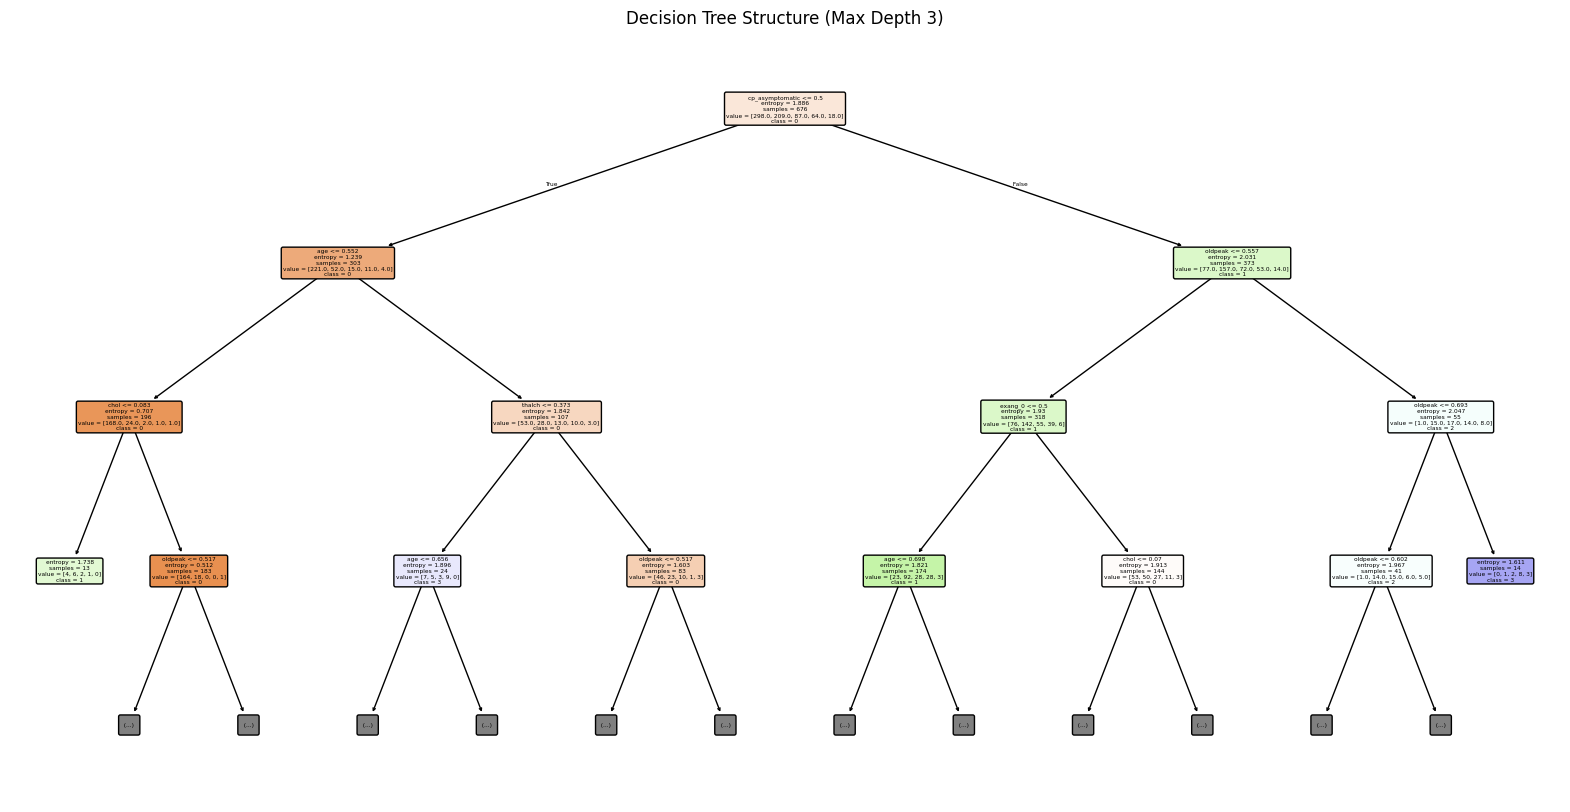


Feature Importances:
cp_asymptomatic             0.337246
oldpeak                     0.224208
age                         0.161463
chol                        0.117364
thalch                      0.063329
exang_0                     0.050711
thal_normal                 0.031652
cp_atypical angina          0.014027
fbs                         0.000000
sex                         0.000000
trestbps                    0.000000
cp_typical angina           0.000000
restecg_lv hypertrophy      0.000000
restecg_normal              0.000000
cp_non-anginal              0.000000
restecg_st-t abnormality    0.000000
exang_1                     0.000000
slope_downsloping           0.000000
exang_FALSE                 0.000000
slope_flat                  0.000000
slope_upsloping             0.000000
thal_fixed defect           0.000000
thal_reversable defect      0.000000
dtype: float64


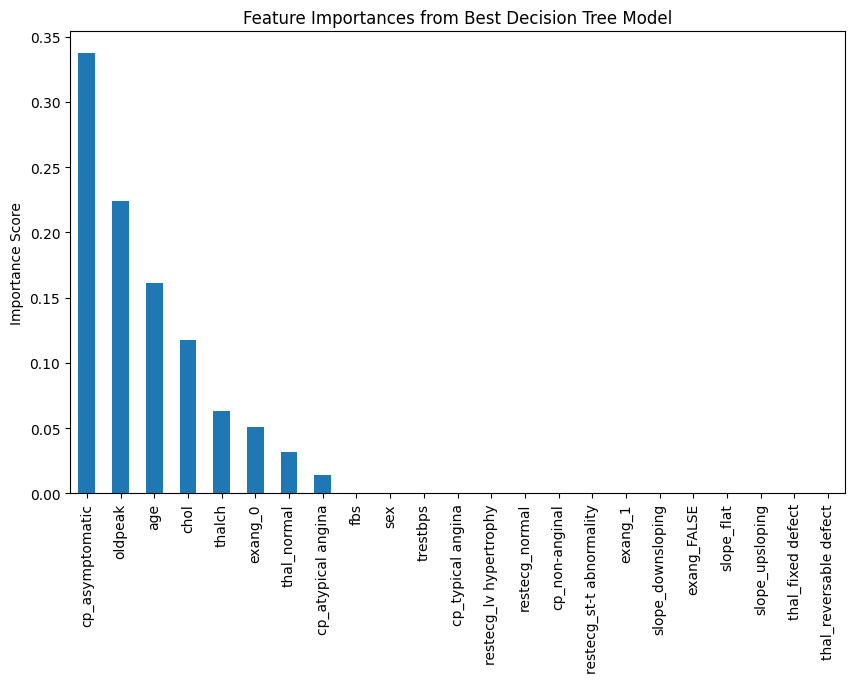

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the Decision Tree structure
# You can adjust max_depth to visualize a smaller part of the tree if it's too large
plt.figure(figsize=(20,10))
plot_tree(best_dt_model, filled=True, feature_names=X_train.columns.tolist(), class_names=['0', '1', '2', '3', '4'], rounded=True, proportion=False, max_depth=3)
plt.title("Decision Tree Structure (Max Depth 3)")
plt.show()

# Identify Feature Importances
feature_importances = pd.Series(best_dt_model.feature_importances_, index=X_train.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

print("\nFeature Importances:")
print(sorted_importances)

# Plot Feature Importances
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='bar')
plt.title("Feature Importances from Best Decision Tree Model")
plt.ylabel("Importance Score")
plt.show()

# Interview Questions:

**1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?**

Decision tree models have several important hyperparameters that influence their performance, affecting accuracy, complexity, and generalization. Here are some key ones:

- **Max Depth**: Determines the maximum number of levels in the tree. A deeper tree can capture more intricate patterns but risks overfitting.
- **Min Samples Split**: Specifies the minimum number of samples required to split an internal node. Higher values prevent excessive splitting, leading to simpler models.
- **Min Samples Leaf**: Sets the minimum number of samples a leaf node must have. Larger values create smoother, more generalized trees.
- **Max Features**: Controls the number of features considered when making a split, impacting diversity and accuracy.
- **Criterion**: Defines the metric used to measure split quality—commonly Gini impurity or entropy. This influences how nodes are divided.
- **Max Leaf Nodes**: Restricts the number of leaf nodes, helping limit complexity and avoid overfitting.
- **Pruning**: Trims unnecessary branches post-training to improve generalization.

Tuning these hyperparameters properly is key to achieving a balanced model.

**2. What is the difference between the Label encoding and One-hot encoding?**

Here’s a concise breakdown of the differences between label encoding and one-hot encoding:

- **Label Encoding**:
  - Assigns a unique numerical value to each category.
  - Efficient in terms of storage, using a single column.
  - May introduce unintended ordinal relationships between categories.
  - Works well with tree-based models like decision trees and random forests.

- **One-Hot Encoding**:
  - Creates separate binary columns for each category.
  - Prevents misleading ordinal relationships.
  - Increases dimensionality, especially with many categories.
  - Preferred for models like logistic regression and neural networks.

The choice depends on the dataset and model you're using.